Goal:
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

Dataset: 

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

Train_Data
Test_Data

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

## The accuracy of my best model on unseen data is 0.9535138. 

***The accuracy of my best model on unseen data is 0.9535138, whereas the hackathon winner achieved an accuracy of 0.9575305. It's worth mentioning that my laptop isn't designed to handle large-scale data processing. Running these models took a considerable amount of time, making it impractical to load the data for evaluation multiple times. This experience underscores the significance of having powerful computing resources in the field of Data Science, as it greatly affects the capacity to iterate, refine, and optimize models.***

**In the context of customer satisfaction, the difference in accuracy between 0.9535138 and 0.9575305 might not be substantial. While a higher accuracy is always desirable, the impact of the small difference on overall customer satisfaction could be minimal. It is essential to focus on improving the most influential factors affecting customer satisfaction, such as onboard service and seat comfort, as identified in the analysis.**

**Moreover, it is worth noting that customer satisfaction is a complex and multi-dimensional concept. A more comprehensive approach to improve customer satisfaction might involve considering additional factors, such as customer feedback, real-time sentiment analysis, or qualitative research, rather than relying solely on the accuracy of the prediction model. By combining different sources of information, businesses can develop a more holistic understanding of their customers' needs and preferences, which in turn will help drive customer satisfaction improvements.**

# Optimal Model Selection for Enhanced Prediction Performance

**In the process of solving the task, various models were analyzed with the selection of optimal parameters. The chosen model was a LightGBM classifier with Bayesian optimization, which demonstrated the best performance in terms of accuracy and computational efficiency on a standard laptop.**

**Despite the initial class balance of 55% to 45%, the use of the RandomOverSampler method to oversample the minority class showed a positive impact on the model's results. This suggests that even with relatively balanced classes, employing resampling techniques can improve model performance and provide more accurate predictions.**

**The LightGBM model was trained with 10-fold cross-validation on the oversampled data using RandomOverSampler. The optimal threshold for class predictions was determined by maximizing the accuracy score. The final model achieved a high accuracy score, outperforming other tested models while maintaining fast processing times on a standard laptop.** 

**During the analysis process, the key factors influencing passenger satisfaction were identified.**

**Based on the analysis of feature importances, it appears that Onboard_Service and Seat_Comfort are the most important factors contributing to the overall experience of passengers. This suggests that focusing on enhancing the quality of onboard services and ensuring comfortable seating arrangements can significantly improve customer satisfaction and contribute to a more positive travel experience. Airlines should prioritize these aspects in order to maintain a high level of customer satisfaction and attract more passengers.**

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


# Scalers for normalization data
from sklearn.preprocessing import MinMaxScaler

# Splitting data into train and test
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier


# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve


# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, make_scorer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
import scipy.stats as stats

In [3]:

# load data
travel_data = pd.read_csv('Traveldata_train.csv')
survey_data = pd.read_csv('Surveydata_train.csv')
travel_data_test = pd.read_csv('Traveldata_test.csv')
survey_data_test = pd.read_csv('Surveydata_test.csv')


In [4]:
travel_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [5]:
survey_data.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


***It is always important to create copies of the dataset during the data processing stage to minimize the time spent on redoing steps. By working with copies, you can avoid altering the original dataset and prevent the need to reload or reprocess it when experimenting with different data preprocessing techniques. This approach helps maintain the integrity of the raw data and allows for more efficient and streamlined experimentation, leading to quicker results and better model development.***

In [6]:
traveldata_train = travel_data.copy()
surveydata_train = survey_data.copy()
traveldata_test = travel_data_test.copy()
surveydata_test = survey_data_test.copy()

In [7]:
traveldata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [8]:
traveldata_train.duplicated().sum()

0

In [9]:
traveldata_train.ID.nunique()

94379

In [10]:
traveldata_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [11]:
surveydata_train.ID.nunique()

94379

In [12]:
surveydata_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [13]:
surveydata_train.duplicated().sum()

0

In [14]:
merged_data_test = pd.merge(traveldata_test, surveydata_test, on='ID')

# Display the first five rows of the combined table
print(merged_data_test.head())

         ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female                NaN  36.0  Business Travel     Business   
1  99900002  Female  Disloyal Customer  21.0  Business Travel     Business   
2  99900003    Male     Loyal Customer  60.0  Business Travel     Business   
3  99900004  Female     Loyal Customer  29.0  Personal Travel          Eco   
4  99900005    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              532                      0.0                    0.0   
1             1425                      9.0                   28.0   
2             2832                      0.0                    0.0   
3             1352                      0.0                    0.0   
4             1610                     17.0                    0.0   

     Seat_Comfort  ... Onboard_Wifi_Service Onboard_Entertainment  \
0      Acceptable  ...    Needs Improveme

In [15]:
# Join tables by 'ID' column
merged_data = pd.merge(traveldata_train, surveydata_train, on='ID')

# Display the first five rows of the combined table
print(merged_data.head())

         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

   Overall_Experience  ... Onboard_Wifi_Service Onboard_Entertainment  \
0                   0  ...                 Good     Nee

In [16]:
data = merged_data.copy()

In [17]:
dataT = merged_data_test.copy()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [19]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [20]:
dataT.isnull().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [21]:
data.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [27]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)
print(cat_col)

['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']


In [23]:
# Making a list of all categorical variables
cat_colT = list(dataT.select_dtypes("object").columns)
print(cat_colT)

['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']


In [24]:
# Making a list of all categorical variables
num_col = list(data.select_dtypes(include=["int64", "float64"]).columns)
print(num_col)

['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Overall_Experience']


In [25]:
# Making a list of all categorical variables
num_colT = list(dataT.select_dtypes(include=["int64", "float64"]).columns)
print(num_colT)

['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']


**Сheck the percentage distribution of data for the cases where Overall_Experience = 0 and Overall_Experience = 1**

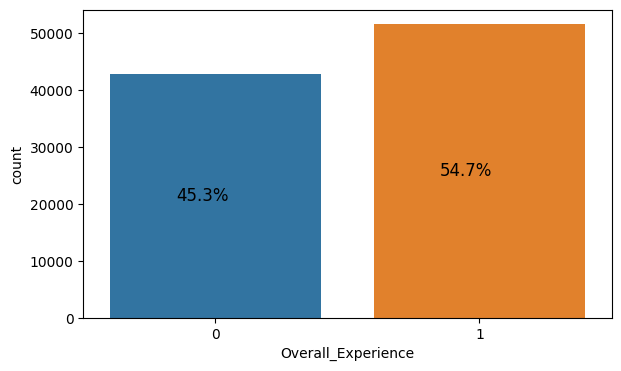

In [26]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Overall_Experience', data=data)

total = len(data['Overall_Experience'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), size=12, ha='center', va='center')

plt.show()

## Exploratory Data Analysis (EDA)

In [20]:
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


ID
Skew : 0.0


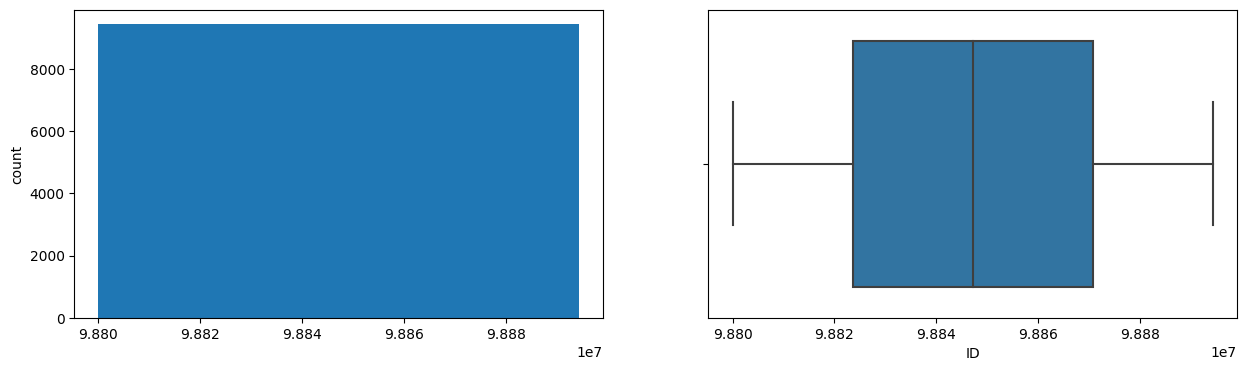

Age
Skew : -0.0


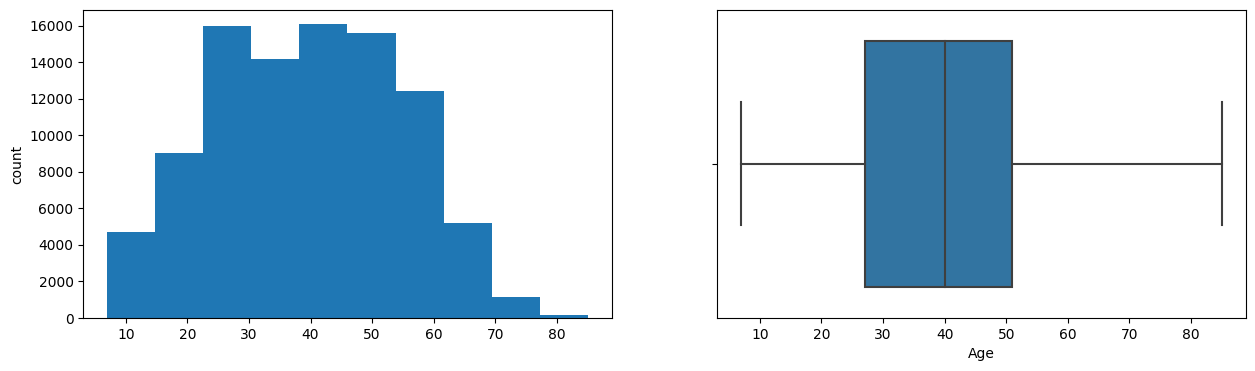

Travel_Distance
Skew : 0.47


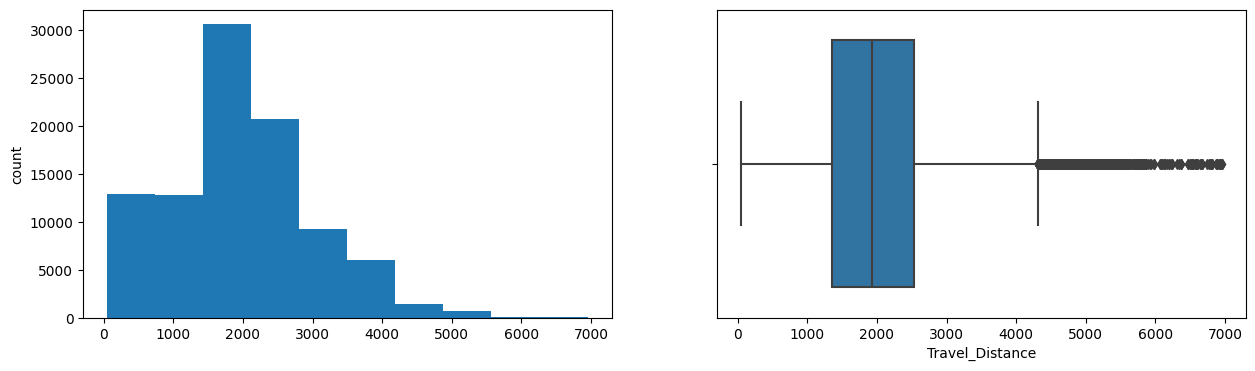

Departure_Delay_in_Mins
Skew : 7.16


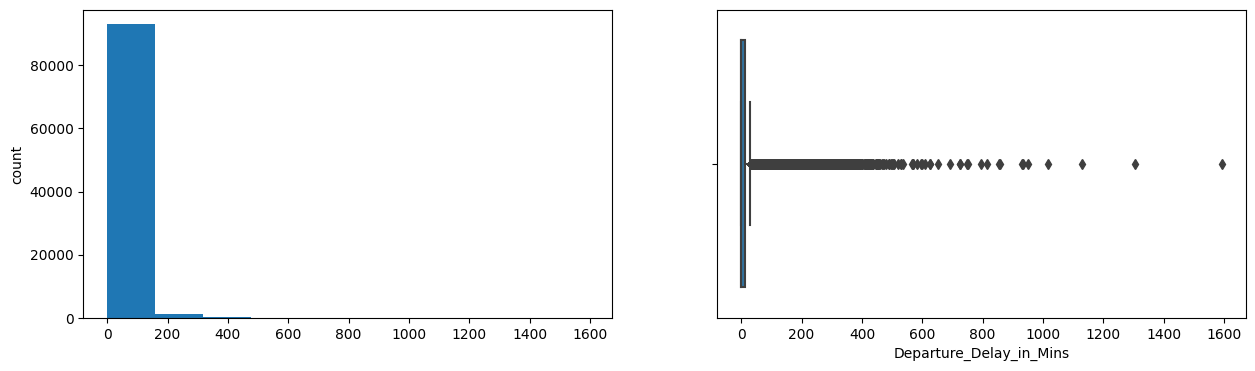

Arrival_Delay_in_Mins
Skew : 6.98


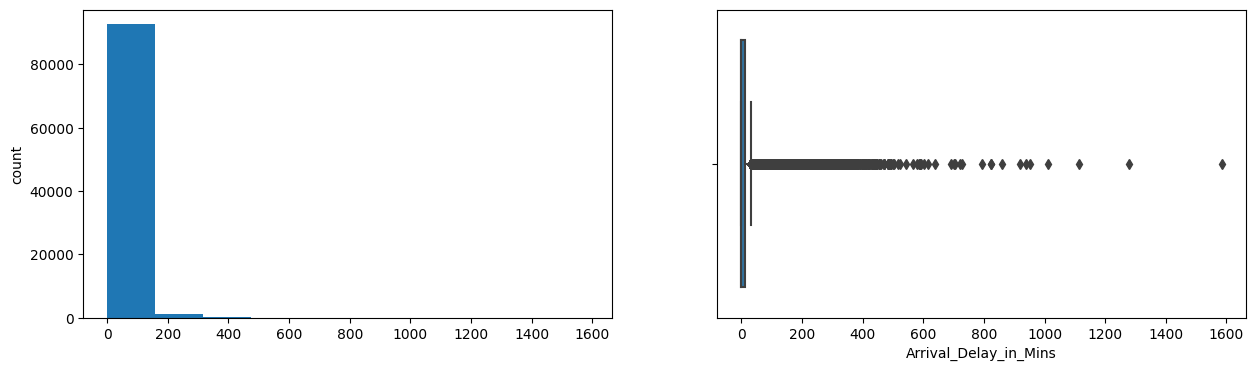

Overall_Experience
Skew : -0.19


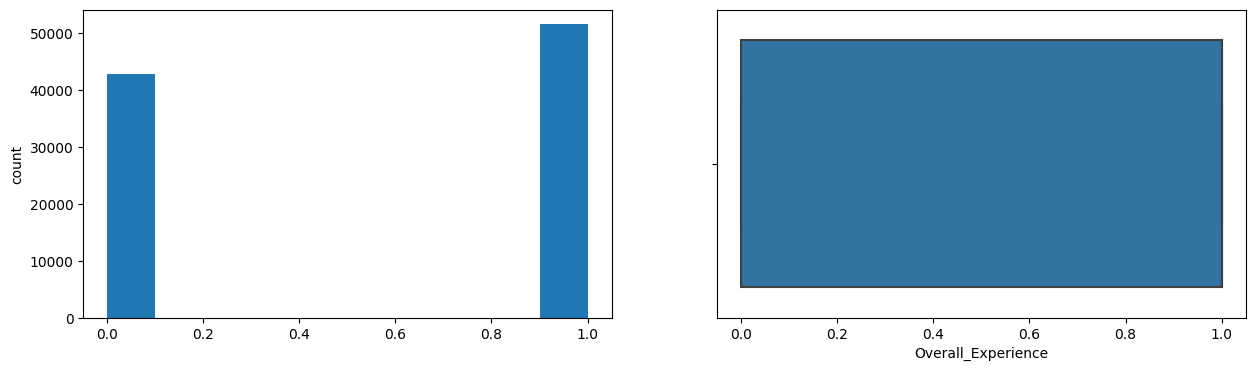

In [21]:
cont_cols = list(data[num_col].columns)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(data[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

Gender
Customer_Type
Type_Travel
Travel_Class
Seat_Comfort
Seat_Class
Arrival_Time_Convenient
Catering
Platform_Location
Onboard_Wifi_Service
Onboard_Entertainment
Online_Support
Ease_of_Online_Booking
Onboard_Service
Legroom
Baggage_Handling
CheckIn_Service
Cleanliness
Online_Boarding


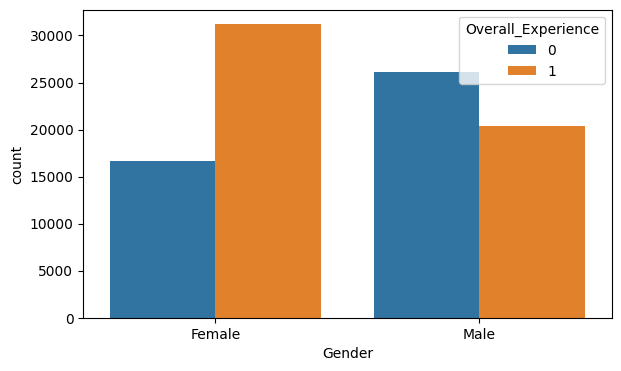

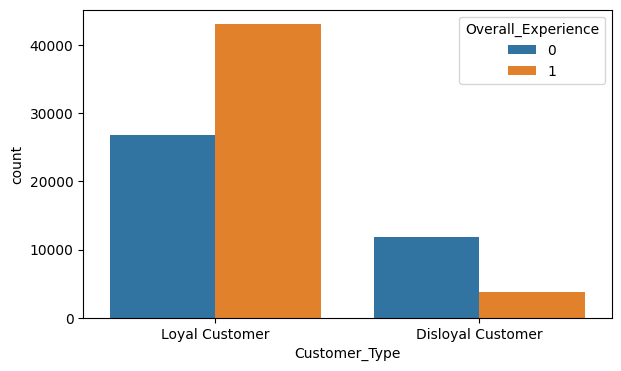

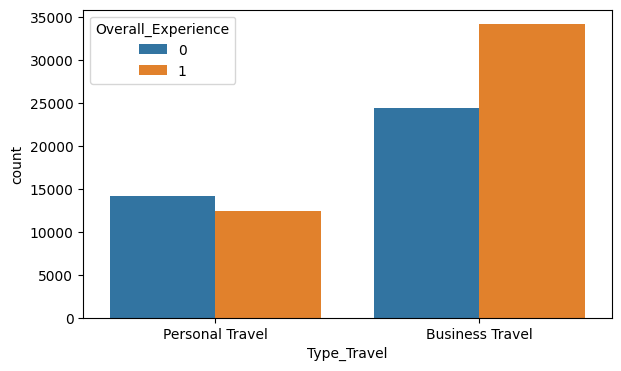

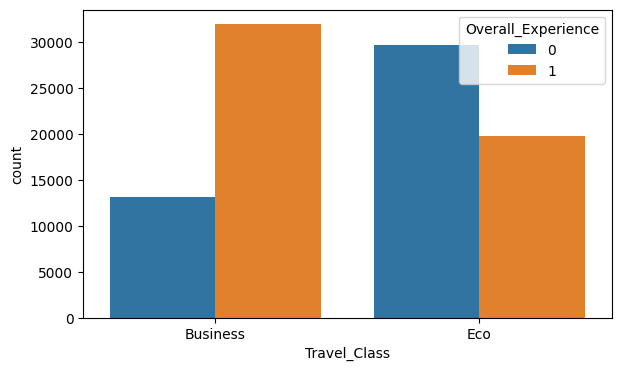

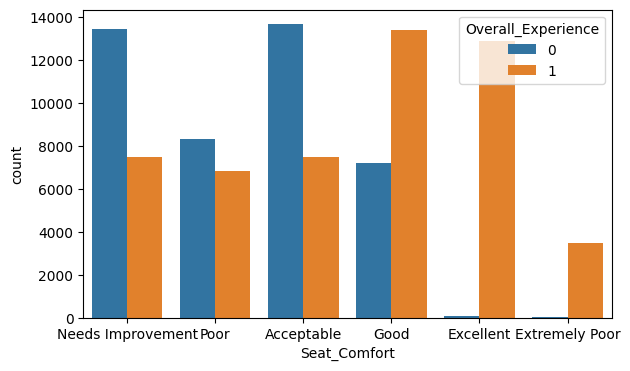

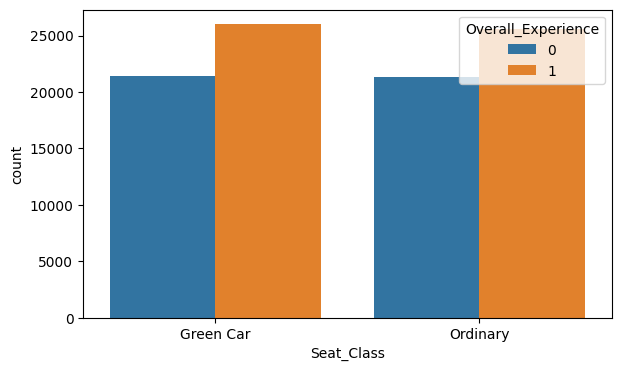

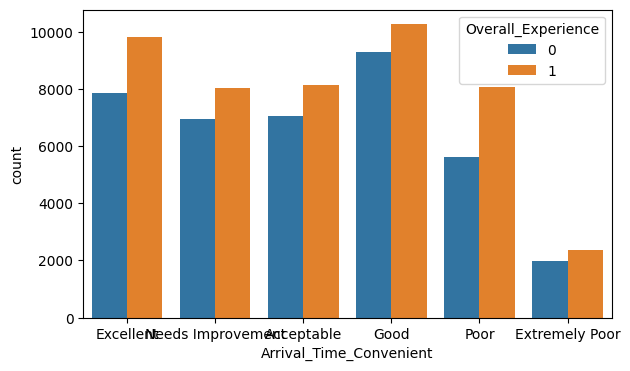

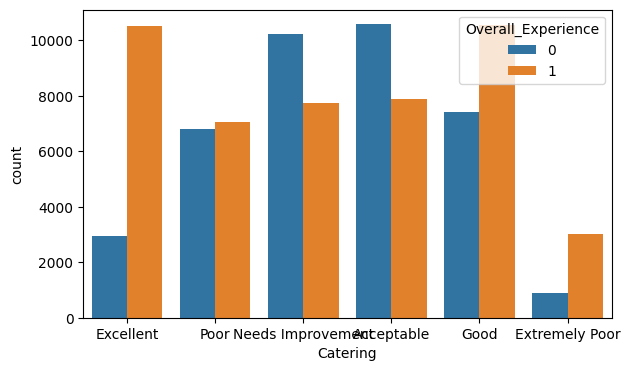

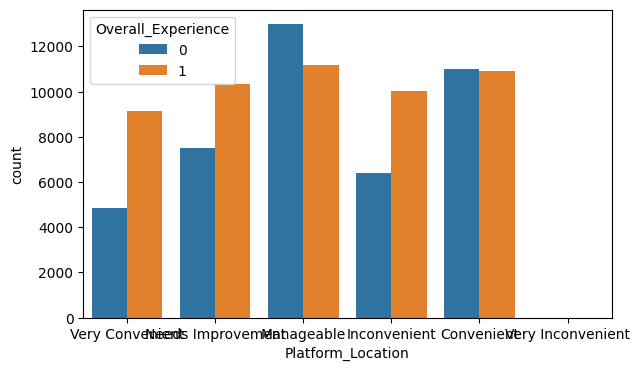

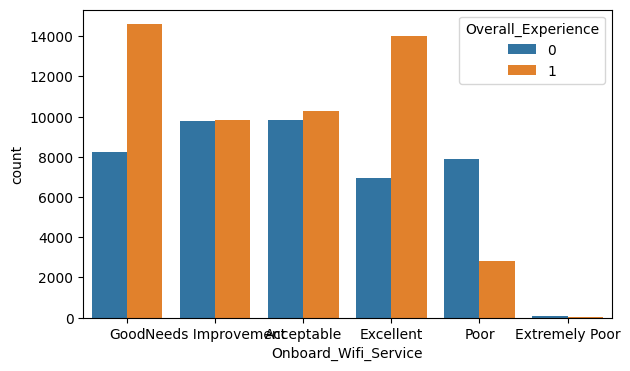

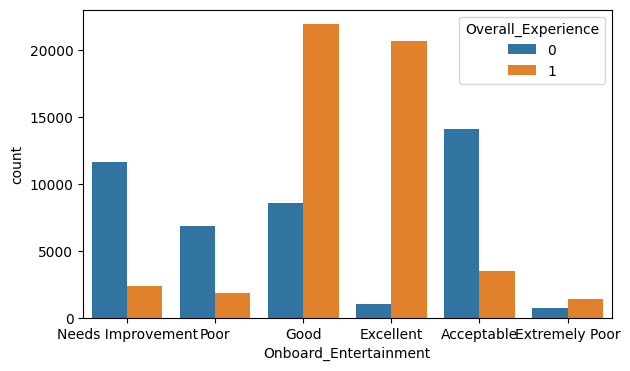

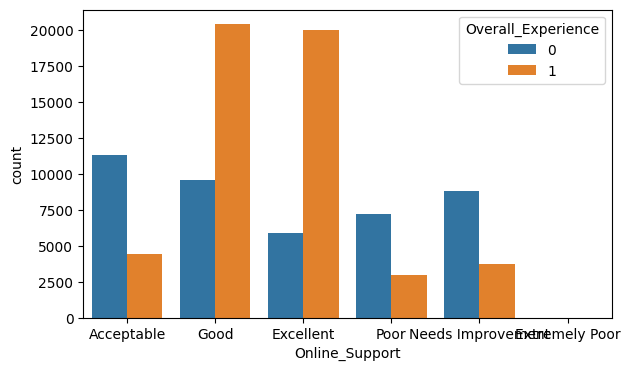

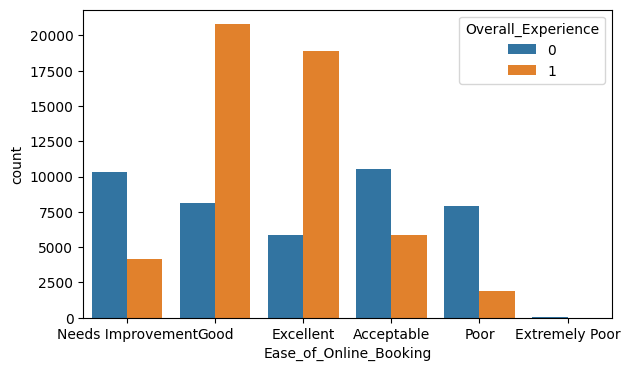

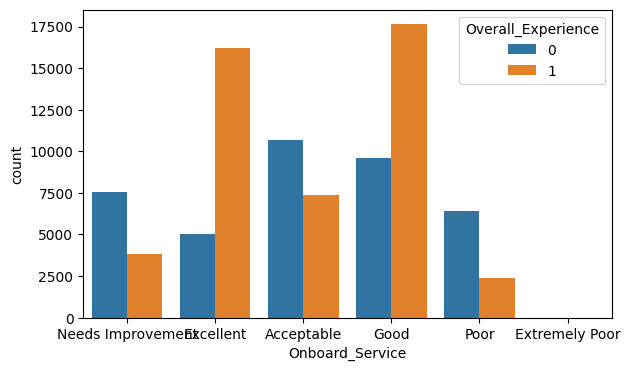

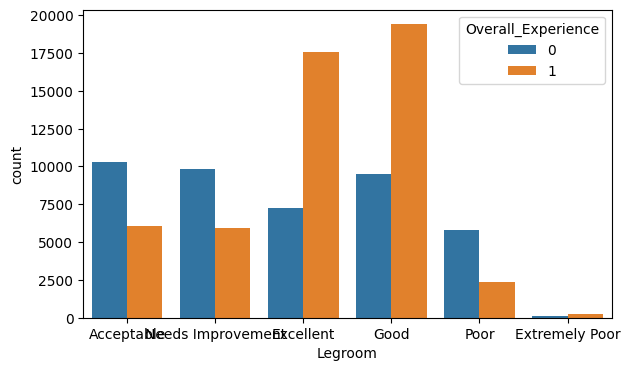

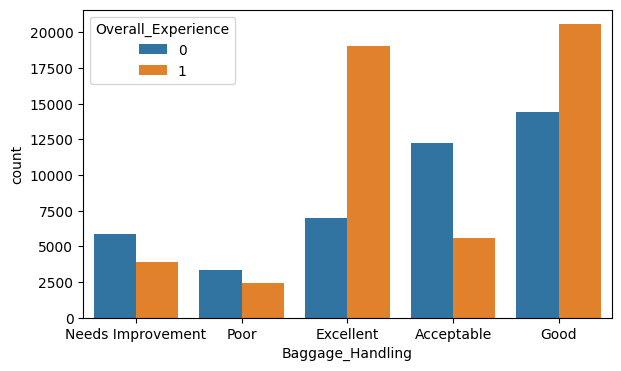

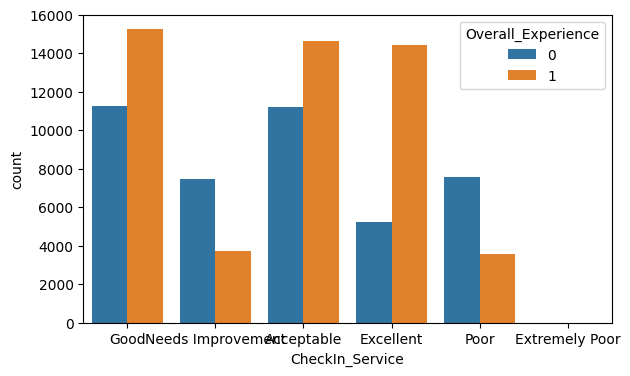

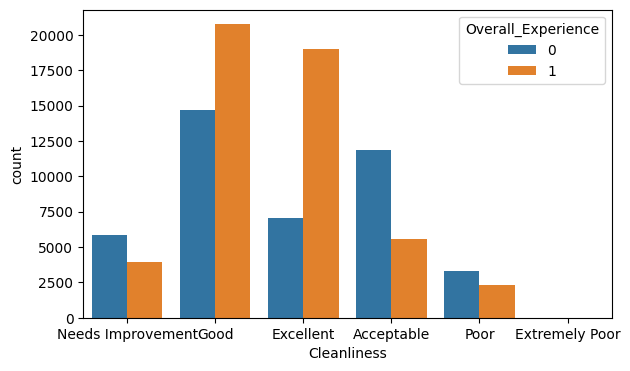

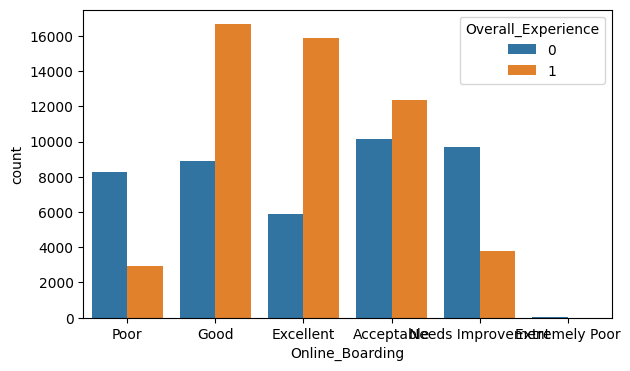

In [22]:
cont_cols = list(data[cat_col].columns)

for col in cont_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x = col, hue = 'Overall_Experience', data = data)

### Based on the percentages of positive overall experience in different categories, we can conclude that the most important factors for train passengers are:

- **Legroom (Leg_Room) - passengers with "excellent" legroom have a positive overall experience percentage of 93.26%.**
- **Onboard Service (Onboard_Service) - passengers who rated the onboard service as "excellent" have a positive overall experience percentage of 87.15%.**
- **Onboard Entertainment (Inflight_Entertainment) - passengers who rated the onboard entertainment as "excellent" have a positive overall experience percentage of 78.21%.**
- **These factors can be considered as the primary ones for improving the overall experience of train passengers and increasing the level of satisfaction.**

### Convert categorical data into numerical values that can be used by machine learning algorithms

In [52]:
data['Gender'].value_counts()

Female    47691
Male      46364
Name: Gender, dtype: int64

In [53]:
data['Gender'] = data['Gender'].replace({'Female' : 0, 'Male' : 1})

In [54]:
dataT['Gender'] = dataT['Gender'].replace({'Female' : 0, 'Male' : 1})

In [55]:
data['Customer_Type'].value_counts()

Loyal Customer       69641
Disloyal Customer    15561
Name: Customer_Type, dtype: int64

In [56]:
data['Customer_Type'] = data['Customer_Type'].replace({'Loyal Customer' : 1, 'Disloyal Customer' : 0})

In [57]:
dataT['Customer_Type'] = dataT['Customer_Type'].replace({'Loyal Customer' : 1, 'Disloyal Customer' : 0})

In [58]:
data['Type_Travel'].value_counts()

Business Travel    58412
Personal Travel    26448
Name: Type_Travel, dtype: int64

In [59]:
data['Type_Travel'] = data['Type_Travel'].replace({'Business Travel' : 0, 'Personal Travel' : 1})

In [60]:
dataT['Type_Travel'] = dataT['Type_Travel'].replace({'Business Travel' : 0, 'Personal Travel' : 1})

In [61]:
data['Travel_Class'].value_counts()

Eco         49175
Business    44880
Name: Travel_Class, dtype: int64

In [62]:
data['Travel_Class'] = data['Travel_Class'].replace({'Eco' : 0, 'Business' : 1})

In [63]:
dataT['Travel_Class'] = dataT['Travel_Class'].replace({'Eco' : 0, 'Business' : 1})

In [64]:
data['Seat_Class'].value_counts()

Green Car    47270
Ordinary     46785
Name: Seat_Class, dtype: int64

In [65]:
data['Seat_Class'] = data['Travel_Class'].replace({'Ordinary' : 0, 'Green Car' : 1})

In [66]:
dataT['Seat_Class'] = dataT['Travel_Class'].replace({'Ordinary' : 0, 'Green Car' : 1})

In [67]:
data['Seat_Comfort'].value_counts()

Acceptable           21098
Needs Improvement    20894
Good                 20548
Poor                 15140
Excellent            12926
Extremely Poor        3449
Name: Seat_Comfort, dtype: int64

In [68]:
data['Seat_Comfort'] = data['Seat_Comfort'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [69]:
dataT['Seat_Comfort'] = dataT['Seat_Comfort'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [70]:
data['Arrival_Time_Convenient'].value_counts()

Good                 19536
Excellent            17639
Acceptable           15132
Needs Improvement    14949
Poor                 13657
Extremely Poor        4321
Name: Arrival_Time_Convenient, dtype: int64

In [71]:
data['Arrival_Time_Convenient']= data['Arrival_Time_Convenient'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [72]:
dataT['Arrival_Time_Convenient']= dataT['Arrival_Time_Convenient'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [73]:
data['Catering'].value_counts()

Acceptable           18400
Needs Improvement    17920
Good                 17911
Poor                 13822
Excellent            13410
Extremely Poor        3893
Name: Catering, dtype: int64

In [74]:
data['Catering']= data['Catering'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [75]:
dataT['Catering']= dataT['Catering'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [76]:
data['Platform_Location'].value_counts()

Manageable           24085
Convenient           21854
Needs Improvement    17777
Inconvenient         16406
Very Convenient      13931
Very Inconvenient        2
Name: Platform_Location, dtype: int64

In [77]:
data['Platform_Location']= data['Platform_Location'].replace({'Very Inconvenient' : 0, 'Inconvenient' : 1, 'Needs Improvement' : 2, 'Manageable' : 3, 'Convenient' : 4, 'Very Convenient' : 5})

In [78]:
dataT['Platform_Location']= dataT['Platform_Location'].replace({'Very Inconvenient' : 0, 'Inconvenient' : 1, 'Needs Improvement' : 2, 'Manageable' : 3, 'Convenient' : 4, 'Very Convenient' : 5})

In [79]:
data['Onboard_Wifi_Service'].value_counts()

Good                 22756
Excellent            20902
Acceptable           20067
Needs Improvement    19536
Poor                 10703
Extremely Poor          91
Name: Onboard_Wifi_Service, dtype: int64

In [80]:
data['Onboard_Wifi_Service']= data['Onboard_Wifi_Service'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [81]:
dataT['Onboard_Wifi_Service']= dataT['Onboard_Wifi_Service'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [82]:
data['Onboard_Entertainment'].value_counts()

Good                 30350
Excellent            21569
Acceptable           17503
Needs Improvement    13889
Poor                  8616
Extremely Poor        2128
Name: Onboard_Entertainment, dtype: int64

In [83]:
data['Onboard_Entertainment']= data['Onboard_Entertainment'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [84]:
dataT['Onboard_Entertainment']= dataT['Onboard_Entertainment'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [85]:
data['Online_Support'].value_counts()

Good                 29939
Excellent            25825
Acceptable           15671
Needs Improvement    12482
Poor                 10137
Extremely Poor           1
Name: Online_Support, dtype: int64

In [86]:
dataT['Online_Support']= dataT['Online_Support'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [87]:
data['Online_Support']= data['Online_Support'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [88]:
data['Ease_of_Online_Booking'].value_counts()

Good                 28835
Excellent            24680
Acceptable           16350
Needs Improvement    14440
Poor                  9734
Extremely Poor          16
Name: Ease_of_Online_Booking, dtype: int64

In [89]:
dataT['Ease_of_Online_Booking']= dataT['Ease_of_Online_Booking'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [90]:
data['Ease_of_Online_Booking']= data['Ease_of_Online_Booking'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [91]:
data['Onboard_Service'].value_counts()

Good                 27198
Excellent            21219
Acceptable           18030
Needs Improvement    11359
Poor                  8748
Extremely Poor           4
Name: Onboard_Service, dtype: int64

In [92]:
dataT['Onboard_Service']= dataT['Onboard_Service'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [93]:
data['Onboard_Service']= data['Onboard_Service'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [94]:
data['Legroom'].value_counts()

Good                 28796
Excellent            24785
Acceptable           16339
Needs Improvement    15712
Poor                  8084
Extremely Poor         339
Name: Legroom, dtype: int64

In [95]:
data['Legroom']= data['Legroom'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [96]:
dataT['Legroom']= dataT['Legroom'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [97]:
data['Baggage_Handling'].value_counts()

Good                 34875
Excellent            25957
Acceptable           17732
Needs Improvement     9738
Poor                  5753
Name: Baggage_Handling, dtype: int64

In [98]:
data['Baggage_Handling']= data['Baggage_Handling'].replace({'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [99]:
dataT['Baggage_Handling']= dataT['Baggage_Handling'].replace({'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [100]:
data['CheckIn_Service'].value_counts()

Good                 26423
Acceptable           25745
Excellent            19585
Needs Improvement    11194
Poor                 11107
Extremely Poor           1
Name: CheckIn_Service, dtype: int64

In [101]:
data['CheckIn_Service']= data['CheckIn_Service'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [102]:
dataT['CheckIn_Service']= dataT['CheckIn_Service'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [103]:
data['Cleanliness'].value_counts()

Good                 35310
Excellent            25976
Acceptable           17382
Needs Improvement     9775
Poor                  5607
Extremely Poor           5
Name: Cleanliness, dtype: int64

In [104]:
data['Cleanliness']= data['Cleanliness'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [105]:
dataT['Cleanliness']= dataT['Cleanliness'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [106]:
data['Online_Boarding'].value_counts()

Good                 25444
Acceptable           22413
Excellent            21657
Needs Improvement    13409
Poor                 11120
Extremely Poor          12
Name: Online_Boarding, dtype: int64

In [107]:
data['Online_Boarding']= data['Online_Boarding'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

In [108]:
dataT['Online_Boarding']= dataT['Online_Boarding'].replace({'Extremely Poor' : 0, 'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5})

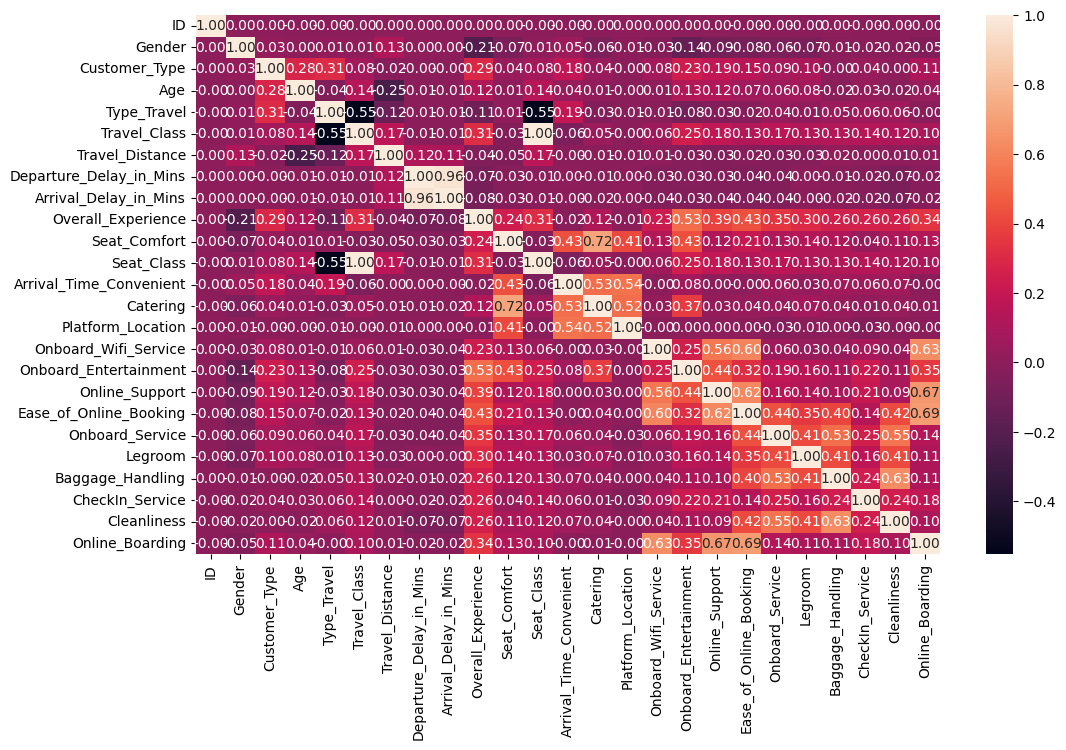

In [109]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

plt.show()

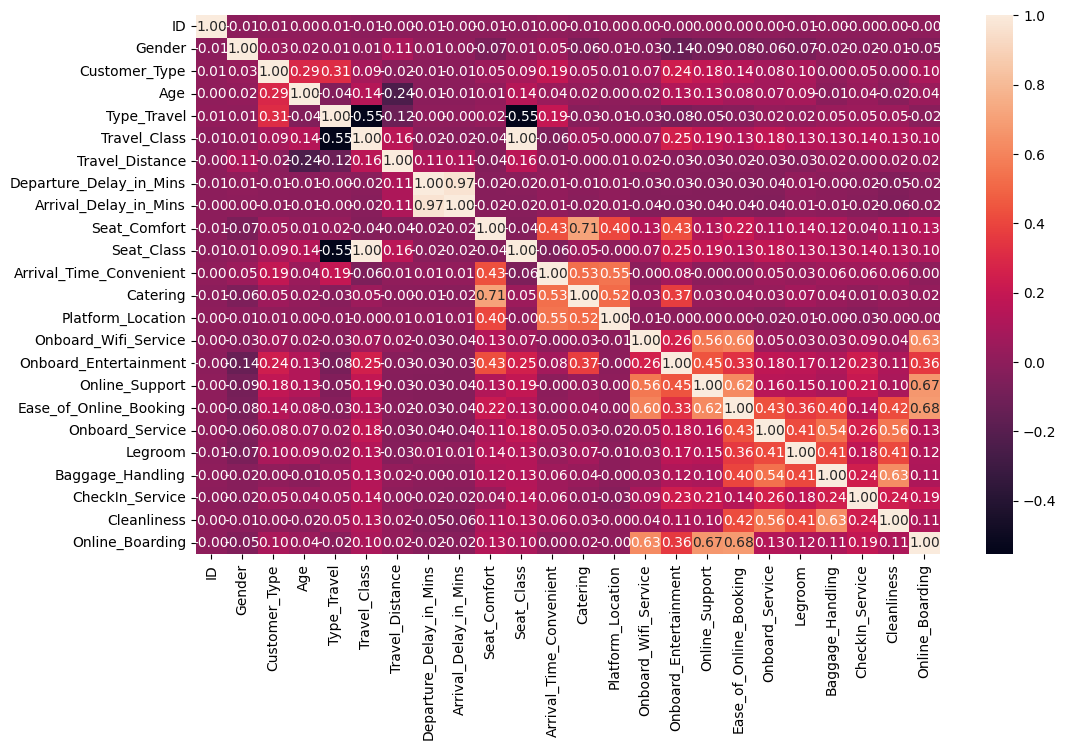

In [110]:
plt.figure(figsize = (12, 7))

sns.heatmap(dataT.corr(), annot = True, fmt = '.2f')

plt.show()

## Data preparation is the most crucial stage in the Data Science process, as it lays the foundation for subsequent analysis, modeling, and interpretation of results.

### By selecting the most suitable imputation method based on the characteristics of the data, we can achieve better results and maintain the integrity of our dataset.

**In this case, I used linear regression to impute missing values for features that had a relatively strong correlation. For the remaining features with weaker correlations, I employed median or mode imputation methods. It is worth noting that the K-Nearest Neighbors (KNN) imputation method turned out to be ineffective in this scenario.**

***In cases where variables exhibit strong correlation, linear regression can be a useful method for imputing missing values. By leveraging the relationship between the correlated variables, the linear regression model can predict the missing values based on the existing data. This approach is especially helpful when the underlying data structure has a linear pattern, allowing for more accurate imputations. However, it is crucial to verify the strength of the correlation and the linear relationship between the variables before employing this technique, as it may not be appropriate for all cases.***

In [111]:
data_before_Fill = data.copy()

In [172]:
# data_before_FillT = dataT.copy()

In [112]:
Departure_delay_median = data['Departure_Delay_in_Mins'].median()
data['Departure_Delay_in_Mins'].fillna(Departure_delay_median, inplace=True)

In [113]:
Departure_delay_median = dataT['Departure_Delay_in_Mins'].median()
dataT['Departure_Delay_in_Mins'].fillna(Departure_delay_median, inplace=True)

In [114]:
from sklearn.linear_model import LinearRegression
def fill_arrival_delay_based_on_departure_delay(data):
    not_null_data = data[(data['Departure_Delay_in_Mins'].notnull()) & (data['Arrival_Delay_in_Mins'].notnull())]

    model = LinearRegression()

    X = not_null_data['Departure_Delay_in_Mins'].values.reshape(-1, 1)
    y = not_null_data['Arrival_Delay_in_Mins']
    model.fit(X, y)

    missing_arrival_delay = data[data['Arrival_Delay_in_Mins'].isnull()]['Departure_Delay_in_Mins']
    if not missing_arrival_delay.empty:
        predicted_arrival_delay = model.predict(missing_arrival_delay.values.reshape(-1, 1))
        data.loc[missing_arrival_delay.index, 'Arrival_Delay_in_Mins'] = predicted_arrival_delay

fill_arrival_delay_based_on_departure_delay(data)

In [115]:
from sklearn.linear_model import LinearRegression
def fill_arrival_delay_based_on_departure_delayT(dataT):
    not_null_dataT = dataT[(dataT['Departure_Delay_in_Mins'].notnull()) & (dataT['Arrival_Delay_in_Mins'].notnull())]

    modelT = LinearRegression()

    XT = not_null_dataT['Departure_Delay_in_Mins'].values.reshape(-1, 1)
    yT = not_null_dataT['Arrival_Delay_in_Mins']
    modelT.fit(XT, yT)

    missing_arrival_delayT = dataT[dataT['Arrival_Delay_in_Mins'].isnull()]['Departure_Delay_in_Mins']
    if not missing_arrival_delayT.empty:
        predicted_arrival_delayT = modelT.predict(missing_arrival_delayT.values.reshape(-1, 1))
        dataT.loc[missing_arrival_delayT.index, 'Arrival_Delay_in_Mins'] = predicted_arrival_delayT

fill_arrival_delay_based_on_departure_delayT(dataT)

In [116]:
Departure_delay_median = data['Age'].median()
data['Age'].fillna(Departure_delay_median, inplace=True)

In [117]:
Departure_delay_medianT = dataT['Age'].median()
dataT['Age'].fillna(Departure_delay_medianT, inplace=True)

In [162]:
# Searching for rows with missing values in multiple columns
rows_with_missing_values = data[ data['Seat_Comfort'].isnull()]
# Getting the indices of rows with missing values
index_of_rows_to_drop = rows_with_missing_values.index
# Dropping the rows
data = data.drop(index_of_rows_to_drop)

In [163]:
Seat_Comfort_modeT = dataT['Seat_Comfort'].mode()[0]
dataT['Seat_Comfort'].fillna(Seat_Comfort_modeT, inplace=True)

In [164]:
# Searching for rows with missing values in multiple columns
rows_with_missing_values = data[ data['Platform_Location'].isnull()]
# Getting the indices of rows with missing values
index_of_rows_to_drop = rows_with_missing_values.index
index_of_rows_to_drop = rows_with_missing_values.index
# Dropping the rows 
data = data.drop(index_of_rows_to_drop)

In [122]:
Departure_delay_modeT = dataT['Platform_Location'].mode()[0]
dataT['Platform_Location'].fillna(Departure_delay_modeT, inplace=True)

In [130]:
def fill_catering_based_on_seat_comfort_and_platform_location(data):
    not_null_data = data[(data['Catering'].notnull())]

    model = LinearRegression()

    X = not_null_data[['Seat_Comfort', 'Platform_Location']]
    y = not_null_data['Catering']
    model.fit(X, y)

    missing_catering = data[data['Catering'].isnull()][['Seat_Comfort', 'Platform_Location']]
    if not missing_catering.empty:
        predicted_catering = model.predict(missing_catering)
       # Rounding the values
        predicted_catering_rounded = predicted_catering.round()
        data.loc[missing_catering.index, 'Catering'] = predicted_catering_rounded

fill_catering_based_on_seat_comfort_and_platform_location(data)

In [131]:
data.isnull().sum()

ID                            0
Gender                        0
Customer_Type              8853
Age                           0
Type_Travel                9195
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins       0
Arrival_Delay_in_Mins         0
Overall_Experience            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient    8821
Catering                      0
Platform_Location             0
Onboard_Wifi_Service          0
Onboard_Entertainment         0
Online_Support                0
Ease_of_Online_Booking        0
Onboard_Service            7497
Legroom                       0
Baggage_Handling              0
CheckIn_Service               0
Cleanliness                   0
Online_Boarding               0
dtype: int64

In [132]:
def fill_catering_based_on_seat_comfort_and_platform_locationT(dataT):
    not_null_dataT = dataT[(dataT['Catering'].notnull())]

    modelT = LinearRegression()

    XT = not_null_dataT[['Seat_Comfort', 'Platform_Location']]
    yT = not_null_dataT['Catering']
    modelT.fit(XT, yT)

    missing_cateringT = dataT[dataT['Catering'].isnull()][['Seat_Comfort', 'Platform_Location']]
    if not missing_cateringT.empty:
        predicted_cateringT = modelT.predict(missing_cateringT)
        # Rounding the values
        predicted_catering_roundedT = predicted_cateringT.round()
        dataT.loc[missing_cateringT.index, 'Catering'] = predicted_catering_roundedT

fill_catering_based_on_seat_comfort_and_platform_locationT(dataT)

In [133]:
def fill_arrival_time_convenient_based_on_catering_and_platform_location(data):
    not_null_data = data[(data['Arrival_Time_Convenient'].notnull())]

    model = LinearRegression()

    X = not_null_data[['Catering', 'Platform_Location']]
    y = not_null_data['Arrival_Time_Convenient']
    model.fit(X, y)

    missing_arrival_time_convenient = data[data['Arrival_Time_Convenient'].isnull()][['Catering', 'Platform_Location']]
    if not missing_arrival_time_convenient.empty:
        predicted_arrival_time_convenient = model.predict(missing_arrival_time_convenient)
        # Rounding the values
        predicted_arrival_time_convenient_rounded = predicted_arrival_time_convenient.round()
        data.loc[missing_arrival_time_convenient.index, 'Arrival_Time_Convenient'] = predicted_arrival_time_convenient_rounded

fill_arrival_time_convenient_based_on_catering_and_platform_location(data)

In [134]:
def fill_arrival_time_convenient_based_on_catering_and_platform_locationT(dataT):
    not_null_dataT = dataT[(dataT['Arrival_Time_Convenient'].notnull())]

    modelT = LinearRegression()

    XT = not_null_dataT[['Catering', 'Platform_Location']]
    yT = not_null_dataT['Arrival_Time_Convenient']
    modelT.fit(XT, yT)

    missing_arrival_time_convenientT = dataT[dataT['Arrival_Time_Convenient'].isnull()][['Catering', 'Platform_Location']]
    if not missing_arrival_time_convenientT.empty:
        predicted_arrival_time_convenientT = modelT.predict(missing_arrival_time_convenientT)
        # Rounding the values
        predicted_arrival_time_convenient_roundedT = predicted_arrival_time_convenientT.round()
        dataT.loc[missing_arrival_time_convenientT.index, 'Arrival_Time_Convenient'] = predicted_arrival_time_convenient_roundedT

fill_arrival_time_convenient_based_on_catering_and_platform_locationT(dataT)

In [135]:
# Searching for rows with missing values in multiple columns
rows_with_missing_values = data[ data['Cleanliness'].isnull()]
# Получаем индексы строк с пропущенными значениями
index_of_rows_to_drop = rows_with_missing_values.index
# Dropping the rows
data = data.drop(index_of_rows_to_drop)

In [136]:
Departure_delay_modeT = dataT['Cleanliness'].mode()[0]
dataT['Cleanliness'].fillna(Departure_delay_modeT, inplace=True)

In [137]:
# Searching for rows with missing values in multiple columns
rows_with_missing_values = data[ data['Baggage_Handling'].isnull()]
# Getting the indices of rows with missing values
index_of_rows_to_drop = rows_with_missing_values.index
# Dropping the rows 
data = data.drop(index_of_rows_to_drop)

In [138]:
Departure_delay_modeT = dataT['Baggage_Handling'].mode()[0]
dataT['Baggage_Handling'].fillna(Departure_delay_modeT, inplace=True)

In [139]:
# Searching for rows with missing values in multiple columns
rows_with_missing_values = data[ data['Online_Support'].isnull()]
# Getting the indices of rows with missing values
index_of_rows_to_drop = rows_with_missing_values.index
# Dropping the rows 
data = data.drop(index_of_rows_to_drop)

In [140]:
Departure_delay_modeT = dataT['Online_Support'].mode()[0]
dataT['Online_Support'].fillna(Departure_delay_modeT, inplace=True)

In [141]:
# Searching for rows with missing values in multiple columns
rows_with_missing_values = data[ data['Gender'].isnull()]
# Getting the indices of rows with missing values
index_of_rows_to_drop = rows_with_missing_values.index
# Dropping the rows
data = data.drop(index_of_rows_to_drop)

In [142]:
Departure_delay_modeT = dataT['Gender'].mode()[0]
dataT['Gender'].fillna(Departure_delay_modeT, inplace=True)

In [143]:
def fill_onboard_service_based_on_baggage_handling_and_cleanliness(data):
    not_null_data = data[(data['Onboard_Service'].notnull())]

    model = LinearRegression()

    X = not_null_data[['Baggage_Handling', 'Cleanliness']]
    y = not_null_data['Onboard_Service']
    model.fit(X, y)

    missing_onboard_service = data[data['Onboard_Service'].isnull()][['Baggage_Handling', 'Cleanliness']]
    if not missing_onboard_service.empty:
        predicted_onboard_service = model.predict(missing_onboard_service)
       # Rounding the values
        predicted_onboard_service_rounded = predicted_onboard_service.round()
        data.loc[missing_onboard_service.index, 'Onboard_Service'] = predicted_onboard_service_rounded

fill_onboard_service_based_on_baggage_handling_and_cleanliness(data)

In [152]:
def fill_onboard_service_based_on_baggage_handling_and_cleanlinessT(dataT):
    not_null_dataT = dataT[(dataT['Onboard_Service'].notnull())]

    modelT = LinearRegression()

    XT = not_null_dataT[['Baggage_Handling', 'Cleanliness']]
    yT = not_null_dataT['Onboard_Service']
    modelT.fit(XT, yT)

    missing_onboard_serviceT = dataT[dataT['Onboard_Service'].isnull()][['Baggage_Handling', 'Cleanliness']]
    if not missing_onboard_serviceT.empty:
        predicted_onboard_serviceT = modelT.predict(missing_onboard_serviceT)
        # Rounding the values
        predicted_onboard_service_roundedT = predicted_onboard_serviceT.round()
        dataT.loc[missing_onboard_serviceT.index, 'Onboard_Service'] = predicted_onboard_service_roundedT

fill_onboard_service_based_on_baggage_handling_and_cleanlinessT(dataT)

In [147]:
def fill_missing_values_mode_by_group(data, column_to_fill, group_by_column):
    grouped_data = data.groupby(group_by_column)

    for group_name, group_data in grouped_data:
        mode_value = group_data[column_to_fill].mode().iloc[0]
        mask = (data[group_by_column] == group_name) & (data[column_to_fill].isnull())
        data.loc[mask, column_to_fill] = mode_value

# Fill missing values in Customer_Type with the mode for each group of Overall_Experience
fill_missing_values_mode_by_group(data, column_to_fill='Customer_Type', group_by_column='Overall_Experience')


In [148]:
Departure_delay_modeT = dataT['Customer_Type'].mode()[0]
dataT['Customer_Type'].fillna(Departure_delay_modeT, inplace=True)

In [149]:
def fill_missing_values_mode_by_group(data, column_to_fill, group_by_column):
    grouped_data = data.groupby(group_by_column)

    for group_name, group_data in grouped_data:
        mode_value = group_data[column_to_fill].mode().iloc[0]
        mask = (data[group_by_column] == group_name) & (data[column_to_fill].isnull())
        data.loc[mask, column_to_fill] = mode_value

# Fill missing values in Type_Travel with the mode for each group of Overall_Experience
fill_missing_values_mode_by_group(data, column_to_fill='Type_Travel', group_by_column='Overall_Experience')


In [150]:
Departure_delay_modeT = dataT['Type_Travel'].mode()[0]
dataT['Type_Travel'].fillna(Departure_delay_modeT, inplace=True)

In [165]:
data.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [154]:
Departure_delay_modeT = dataT['Ease_of_Online_Booking'].mode()[0]
dataT['Ease_of_Online_Booking'].fillna(Departure_delay_modeT, inplace=True)

In [155]:
Departure_delay_modeT = dataT['Legroom'].mode()[0]
dataT['Legroom'].fillna(Departure_delay_modeT, inplace=True)

In [156]:
Departure_delay_modeT = dataT['Onboard_Wifi_Service'].mode()[0]
dataT['Onboard_Wifi_Service'].fillna(Departure_delay_modeT, inplace=True)

In [157]:
Departure_delay_modeT = dataT['CheckIn_Service'].mode()[0]
dataT['CheckIn_Service'].fillna(Departure_delay_modeT, inplace=True)

In [158]:
Departure_delay_modeT = dataT['Online_Boarding'].mode()[0]
dataT['Online_Boarding'].fillna(Departure_delay_modeT, inplace=True)

In [160]:
Departure_delay_modeT = dataT['Onboard_Entertainment'].mode()[0]
dataT['Onboard_Entertainment'].fillna(Departure_delay_modeT, inplace=True)

In [166]:
dataT.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

### Creating metric function

In [167]:
# Creating metric function

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['NOT DEFAULT', 'DEFAULT'], yticklabels = ['NOT DEFAULT', 'DEFAULT'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()
    
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

# LightGBM (LGBM) classifier

In [136]:
dataID = data.copy()

In [137]:
dataID = dataID.drop(columns=['ID'])

In [138]:
dataID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94055 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94055 non-null  float64
 1   Customer_Type            94055 non-null  float64
 2   Age                      94055 non-null  float64
 3   Type_Travel              94055 non-null  float64
 4   Travel_Class             94055 non-null  int64  
 5   Travel_Distance          94055 non-null  int64  
 6   Departure_Delay_in_Mins  94055 non-null  float64
 7   Arrival_Delay_in_Mins    94055 non-null  float64
 8   Overall_Experience       94055 non-null  int64  
 9   Seat_Comfort             94055 non-null  float64
 10  Seat_Class               94055 non-null  int64  
 11  Arrival_Time_Convenient  94055 non-null  float64
 12  Catering                 94055 non-null  float64
 13  Platform_Location        94055 non-null  float64
 14  Onboard_Wifi_Service  

In [139]:
# Separating the target variable and other variables

Y1 = dataID.Overall_Experience

X1 = dataID.drop(['Overall_Experience'], axis = 1)

# Splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 1, stratify = Y1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35985
           1       1.00      1.00      1.00     35985

    accuracy                           1.00     71970
   macro avg       1.00      1.00      1.00     71970
weighted avg       1.00      1.00      1.00     71970



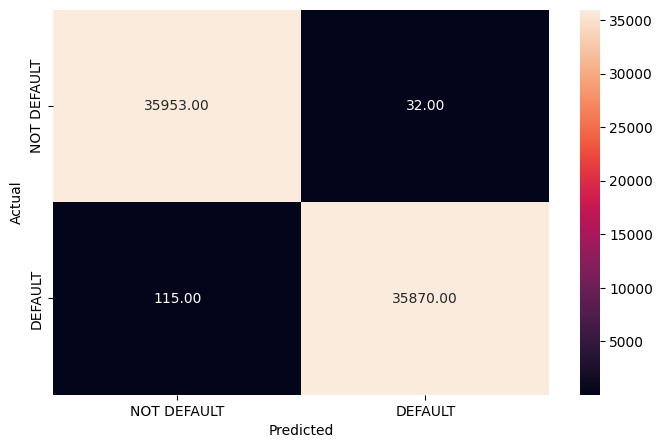

Best threshold: 0.46
Best accuracy: 0.9981936918160345
Test accuracy with optimal threshold: 0.9546372754013538


In [145]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from skopt import BayesSearchCV

# Define kfold with 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Oversample the training data using RandomOverSampler
x1_train_ros, y1_train_ros = ros.fit_resample(x1_train, y1_train)

# LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Define the search space for hyperparameters
search_space_lgbm = {
    "learning_rate": (0.01, 0.2, 'log-uniform'),
    "n_estimators": (50, 500),
    "max_depth": (2, 9),
    "num_leaves": (15, 127),
    "min_child_samples": (10, 50),
    "subsample": (0.5, 1.0),
    "colsample_bytree": (0.5, 1.0),
}

# Instantiate BayesSearchCV
bayes_search = BayesSearchCV(lgbm, search_space_lgbm, n_iter=100, cv=kfold, n_jobs=-1, random_state=42)

# Fit the BayesSearchCV with the oversampled data using RandomOverSampler and 10-fold CV
bayes_search.fit(x1_train_ros, y1_train_ros)

# Set the classifier to the best combination of parameters
lgbm_tuned1 = bayes_search.best_estimator_

# Fit the model
lgbm_tuned1.fit(x1_train_ros, y1_train_ros)

# Make predictions on the training data
y1_pred_train_LGBMBS_ros = lgbm_tuned1.predict(x1_train_ros)
metrics_score(y1_train_ros, y1_pred_train_LGBMBS_ros)

# Get the predicted probabilities for the positive class
y1_pred_prob_train = lgbm_tuned1.predict_proba(x1_train_ros)[:, 1]
y1_pred_prob_test = lgbm_tuned1.predict_proba(x1_test)[:, 1]

# Find the optimal threshold
thresholds = np.arange(0, 1.01, 0.01)
best_threshold = 0.5
best_score = 0

for threshold in thresholds:
    y1_pred_train_threshold = (y1_pred_prob_train >= threshold).astype(int)
    score = accuracy_score(y1_train_ros, y1_pred_train_threshold)
    
    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"Best accuracy: {best_score}")

# Make predictions on the test data using the optimal threshold
y1_pred_test_optimal_threshold = (y1_pred_prob_test >= best_threshold).astype(int)
test_accuracy = accuracy_score(y1_test, y1_pred_test_optimal_threshold)
print(f"Test accuracy with optimal threshold: {test_accuracy}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35985
           1       1.00      1.00      1.00     35985

    accuracy                           1.00     71970
   macro avg       1.00      1.00      1.00     71970
weighted avg       1.00      1.00      1.00     71970



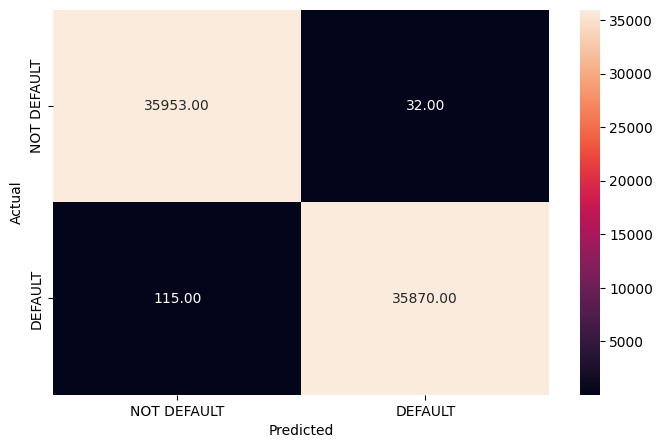

Test accuracy with optimal threshold: 0.9546372754013538


In [146]:
# Define kfold with 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Oversample the training data using RandomOverSampler
x1_train_ros, y1_train_ros = ros.fit_resample(x1_train, y1_train)

# Fit the BayesSearchCV with the oversampled data using RandomOverSampler and 10-fold CV
bayes_search.fit(x1_train_ros, y1_train_ros)

# Set the classifier to the best combination of parameters
lgbm_tuned1 = bayes_search.best_estimator_

# Fit the model
lgbm_tuned1.fit(x1_train_ros, y1_train_ros)

# Make predictions on the training data
y1_pred_train_LGBMBS_ros = lgbm_tuned1.predict(x1_train_ros)
metrics_score(y1_train_ros, y1_pred_train_LGBMBS_ros)

# Get the predicted probabilities for the positive class
y1_pred_prob_train = lgbm_tuned1.predict_proba(x1_train_ros)[:, 1]
y1_pred_prob_test = lgbm_tuned1.predict_proba(x1_test)[:, 1]

# Make predictions on the test data using the optimal threshold
y1_pred_test_optimal_threshold = (y1_pred_prob_test >= 0.46).astype(int)
test_accuracy = accuracy_score(y1_test, y1_pred_test_optimal_threshold)
print(f"Test accuracy with optimal threshold: {test_accuracy}")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12794
           1       0.97      0.95      0.96     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.96      0.95     28217
weighted avg       0.95      0.95      0.95     28217



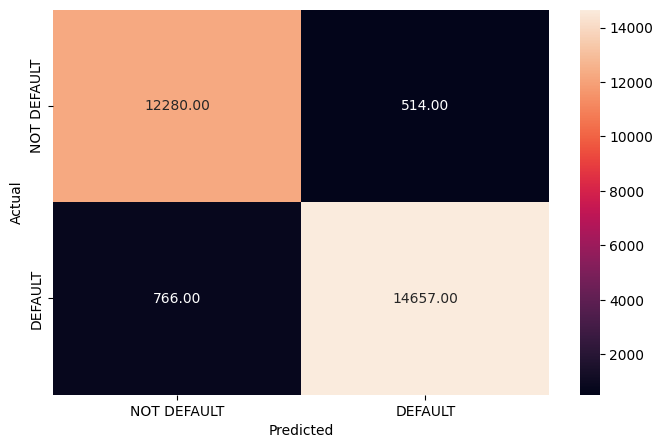

In [149]:
# Evaluate the model on the test data using the optimal threshold
metrics_score(y1_test, y1_pred_test_optimal_threshold)

In [150]:
# Model Performance on the test data
optimal_threshold = model_performance_classification(lgbm_tuned1,x1_test,y1_test)

optimal_threshold

,Precision,Recall,Accuracy
0,0.953332,0.955278,0.954425


In [212]:
dataIDT = dataT.copy()

In [218]:
#dataT = dataIDT.copy()

In [220]:
# Сохраните исходные ID
original_ID = dataT['ID'].copy()

# Удалите столбец ID, если он присутствует
if 'ID' in dataT.columns:
    dataT = dataT.drop('ID', axis=1)

# Используйте обученную модель для предсказания вероятностей классов
y_pred_prob_dataT = lgbm_tuned1.predict_proba(dataT)[:, 1]

# Примените оптимальный порог (0.46) для получения итоговых меток
optimal_threshold = 0.46
y_pred_dataT = (y_pred_prob_dataT >= optimal_threshold).astype(int)

# Сохраните итоговые предсказания в виде DataFrame с двумя столбцами: ID и предсказанная метка (label)
result = pd.DataFrame({'ID': original_ID, 'Overall_Experience': y_pred_dataT})

# Выведите результаты
print(result.head())

# Сохраните результаты в файл CSV
result.to_csv('predictions.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


## Decision tree

In [94]:
dataI = data.copy()

# Separating the target variable and other variables

Y = dataI.Overall_Experience

X = dataI.drop(['Overall_Experience'], axis = 1)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29853
           1       1.00      1.00      1.00     35985

    accuracy                           1.00     65838
   macro avg       1.00      1.00      1.00     65838
weighted avg       1.00      1.00      1.00     65838



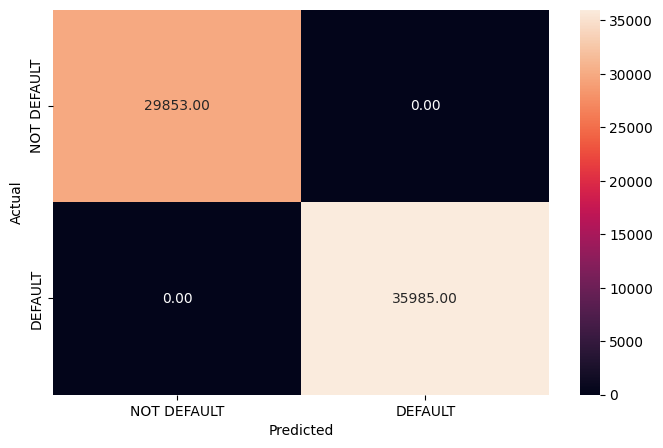

In [268]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

d_tree.fit(x_train, y_train)
# Checking performance on the training data
y_pred_train_DT = d_tree.predict(x_train)
metrics_score(y_train, y_pred_train_DT)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     12794
           1       0.94      0.93      0.93     15423

    accuracy                           0.93     28217
   macro avg       0.93      0.93      0.93     28217
weighted avg       0.93      0.93      0.93     28217



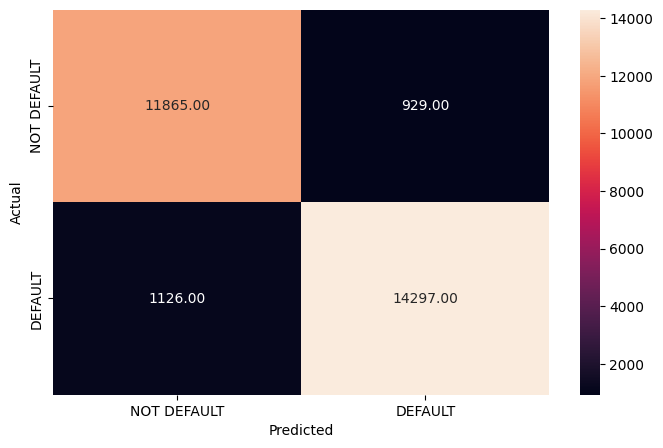

In [269]:
# Checking performance on the testing data
y_pred_test_DT = d_tree.predict(x_test)
metrics_score(y_test, y_pred_test_DT)

In [270]:
# Model Performance on the test data
d_tree_test = model_performance_classification(d_tree,x_test,y_test)

d_tree_test

,Precision,Recall,Accuracy
0,0.926155,0.92719,0.927172


### Feature Importances

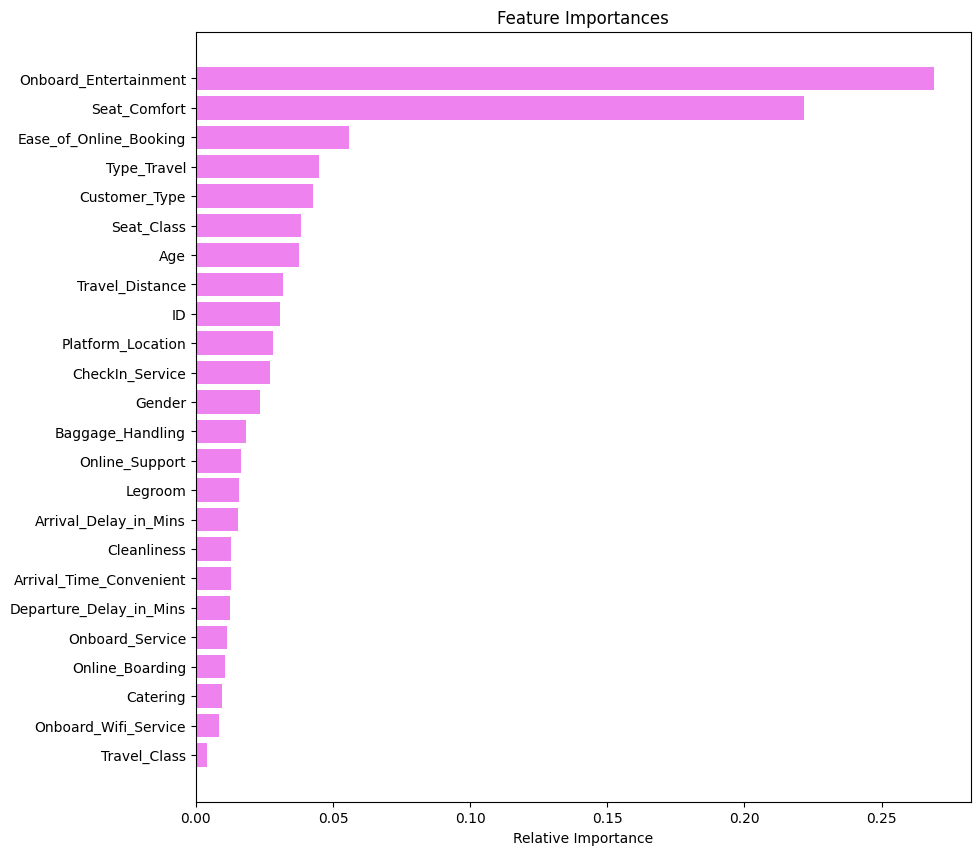

In [273]:
# Определение списка признаков
features = data.columns.tolist()
features.remove('Overall_Experience')
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Based on the analysis of feature importances, it appears that Onboard_Service and Seat_Comfort are the most important factors contributing to the overall experience of passengers. This suggests that focusing on enhancing the quality of onboard services and ensuring comfortable seating arrangements can significantly improve customer satisfaction and contribute to a more positive travel experience. Airlines should prioritize these aspects in order to maintain a high level of customer satisfaction and attract more passengers.**

# Appendix

### In the following appendix, an example is provided demonstrating the process of searching for the optimal model with varying parameters, using the LightGBM (LGBM) classifier.

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29853
           1       0.99      0.98      0.99     35985

    accuracy                           0.98     65838
   macro avg       0.98      0.98      0.98     65838
weighted avg       0.98      0.98      0.98     65838



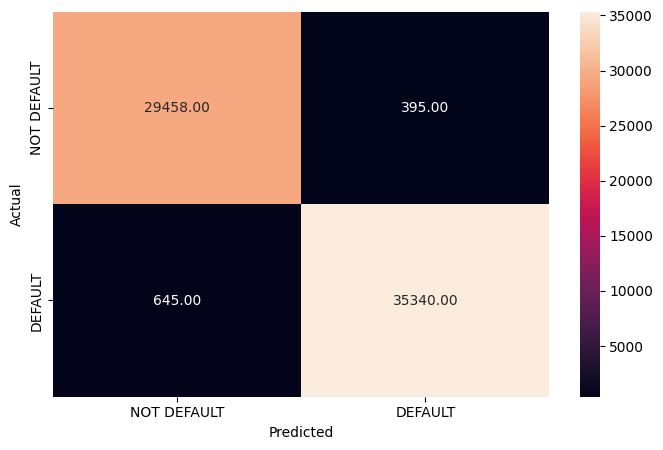

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12794
           1       0.97      0.95      0.96     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.95      0.95     28217
weighted avg       0.95      0.95      0.95     28217



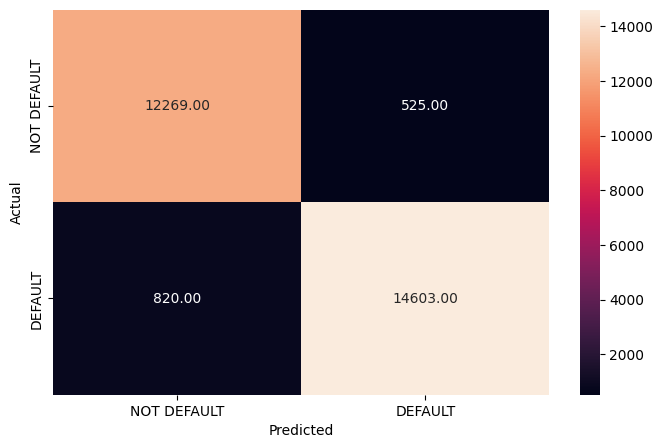

,Precision,Recall,Accuracy
0,0.951324,0.952899,0.952334


In [144]:
from sklearn.model_selection import KFold, RandomizedSearchCV
import lightgbm as lgb

# Define kfold
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Grid of parameters to choose from
params_lgbm = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [2, 3, 5, 7, 9],
    "num_leaves": [15, 31, 63, 127],
    "min_child_samples": [10, 20, 30, 50],
    "subsample": [0.5, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.8, 1.0],
}

# Run the randomized search
random_obj = RandomizedSearchCV(lgbm, params_lgbm,  cv=kfold, n_jobs=-1, n_iter=100, random_state=42)

random_obj1 = random_obj.fit(x1_train, y1_train)

# Set the classifier to the best combination of parameters
lgbm_tuned1 = random_obj1.best_estimator_

# Fit the model
lgbm_tuned1.fit(x1_train, y1_train)

y1_pred_train_LGBMRS = lgbm_tuned1.predict(x1_train)
metrics_score(y1_train, y1_pred_train_LGBMRS)

y1_pred_test_LGBMRS = lgbm_tuned1.predict(x1_test)
# Model Performance on the test data

metrics_score(y1_test, y1_pred_test_LGBMRS)

# Model Performance on the test data
lgbm_tuned_test1 = model_performance_classification(lgbm_tuned1,x1_test,y1_test)

lgbm_tuned_test1

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     29853
           1       0.97      0.95      0.96     35985

    accuracy                           0.96     65838
   macro avg       0.96      0.96      0.96     65838
weighted avg       0.96      0.96      0.96     65838



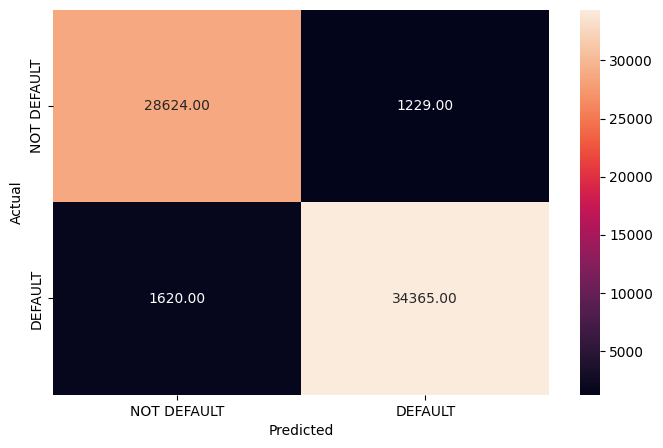

In [302]:
import lightgbm as lgb

# LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Fit the model
lgbm.fit(x_train, y_train)

# Make predictions on train set
y_pred_train_lgbm = lgbm.predict(x_train)

# Compute metrics
metrics_score(y_train, y_pred_train_lgbm)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12794
           1       0.96      0.94      0.95     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.95      0.95     28217
weighted avg       0.95      0.95      0.95     28217



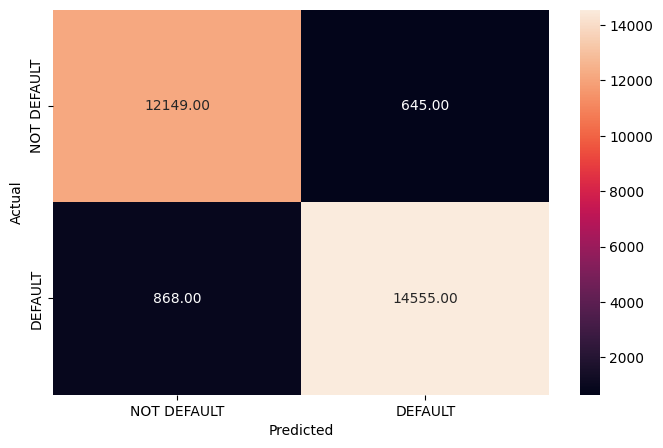

In [303]:
y_pred_test_lgbm = lgbm.predict(x_test)

# Compute metrics
metrics_score(y_test, y_pred_test_lgbm)

In [304]:
# Model Performance on the test data
lgbm_test = model_performance_classification(lgbm,x_test,y_test)

lgbm_test

,Precision,Recall,Accuracy
0,0.945442,0.946653,0.94638


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     29853
           1       0.99      0.98      0.99     35985

    accuracy                           0.99     65838
   macro avg       0.99      0.99      0.99     65838
weighted avg       0.99      0.99      0.99     65838



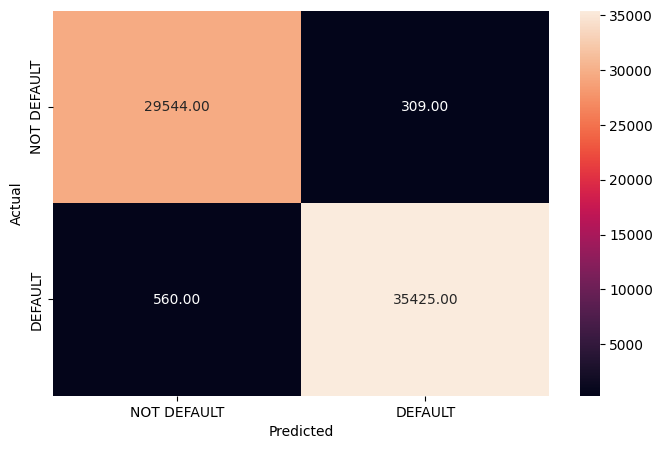

In [100]:
from sklearn.model_selection import KFold, RandomizedSearchCV
import lightgbm as lgb

# Define kfold
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Grid of parameters to choose from
params_lgbm = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [2, 3, 5, 7, 9],
    "num_leaves": [15, 31, 63, 127],
    "min_child_samples": [10, 20, 30, 50],
    "subsample": [0.5, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.8, 1.0],
}

# Run the randomized search
random_obj = RandomizedSearchCV(lgbm, params_lgbm,  cv=kfold, n_jobs=-1, n_iter=100, random_state=42)

random_obj = random_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
lgbm_tuned = random_obj.best_estimator_

# Fit the model
lgbm_tuned.fit(x_train, y_train)

y_pred_train_LGBMRS = lgbm_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_LGBMRS)

y_pred_test_LGBMRS = lgbm_tuned.predict(x_test)
# Model Performance on the test data

metrics_score(y_test, y_pred_test_LGBMRS)

# Model Performance on the test data
lgbm_tuned_test = model_performance_classification(lgbm_tuned,x_test,y_test)

lgbm_tuned_test


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12794
           1       0.96      0.95      0.96     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.95      0.95     28217
weighted avg       0.95      0.95      0.95     28217



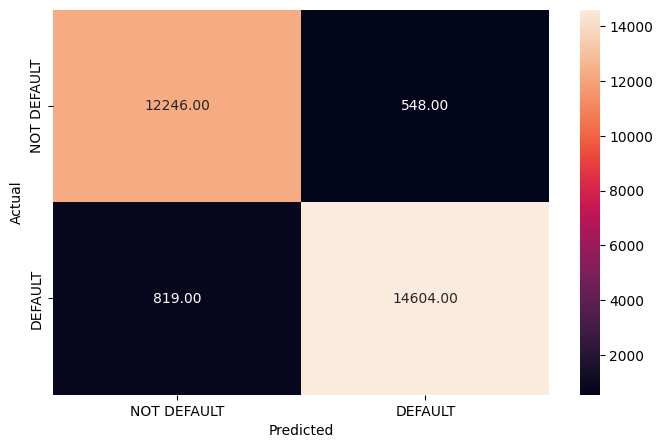

In [101]:
y_pred_test_LGBMRS = lgbm_tuned.predict(x_test)
# Model Performance on the test data

metrics_score(y_test, y_pred_test_LGBMRS)

In [102]:
# Model Performance on the test data
lgbm_tuned_test = model_performance_classification(lgbm_tuned,x_test,y_test)

lgbm_tuned_test

,Precision,Recall,Accuracy
0,0.950573,0.952032,0.951554


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     35985
           1       0.99      0.98      0.99     35985

    accuracy                           0.99     71970
   macro avg       0.99      0.99      0.99     71970
weighted avg       0.99      0.99      0.99     71970



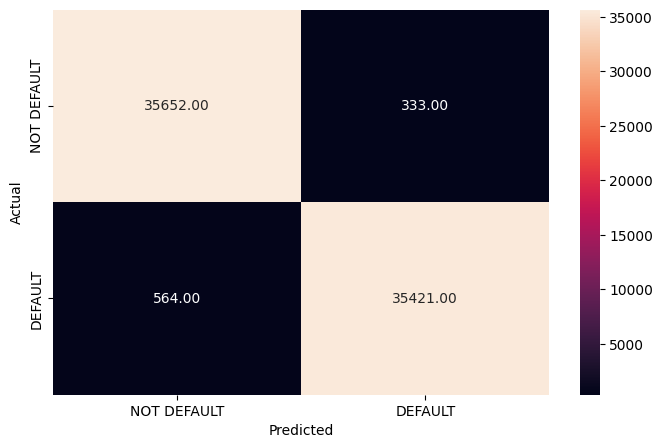

In [103]:
from imblearn.over_sampling import SMOTE

# Oversample the training data using SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Train the model with the oversampled data
lgbm_tuned.fit(x_train_smote, y_train_smote)

# Make predictions on the training data
y_pred_train_LGBMRS_smote = lgbm_tuned.predict(x_train_smote)
metrics_score(y_train_smote, y_pred_train_LGBMRS_smote)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12794
           1       0.96      0.95      0.96     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.95      0.95     28217
weighted avg       0.95      0.95      0.95     28217



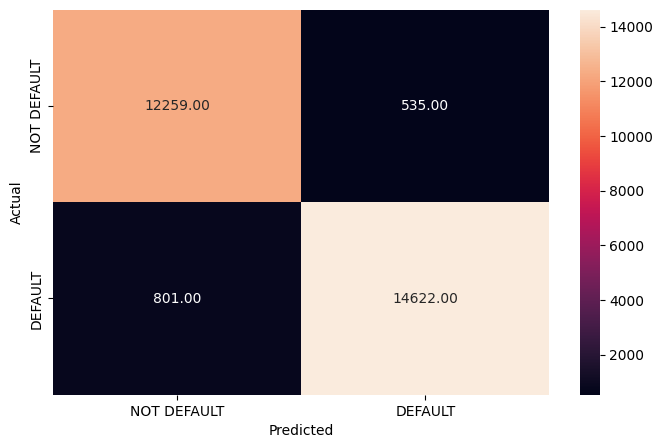

In [104]:
y_pred_test_LGBMRS_smote = lgbm_tuned.predict(x_test)
# Model Performance on the test data
metrics_score(y_test, y_pred_test_LGBMRS_smote)

In [105]:
# Model Performance on the test data
y_pred_test_LGBMRS_smote = model_performance_classification(lgbm_tuned,x_test,y_test)

y_pred_test_LGBMRS_smote

,Precision,Recall,Accuracy
0,0.951685,0.953124,0.952653


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29853
           1       1.00      1.00      1.00     35985

    accuracy                           1.00     65838
   macro avg       1.00      1.00      1.00     65838
weighted avg       1.00      1.00      1.00     65838



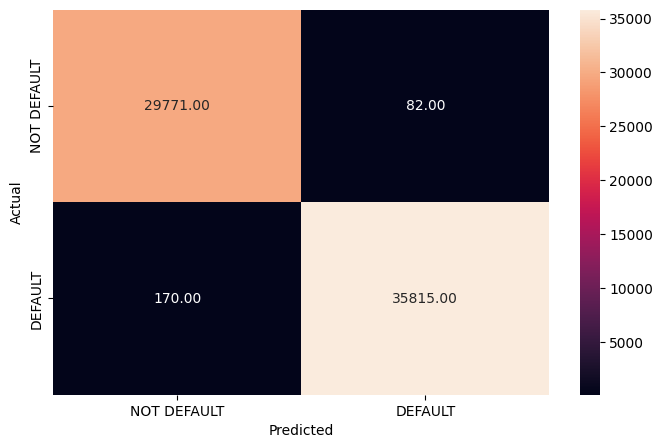

In [123]:
from skopt import BayesSearchCV

# Define the search space for hyperparameters
search_space_lgbm = {
    "learning_rate": (0.01, 0.2, 'log-uniform'),
    "n_estimators": (50, 500),
    "max_depth": (2, 9),
    "num_leaves": (15, 127),
    "min_child_samples": (10, 50),
    "subsample": (0.5, 1.0),
    "colsample_bytree": (0.5, 1.0),
}

# Run the Bayesian optimization search
bayes_obj = BayesSearchCV(lgbm, search_space_lgbm, n_iter=50, cv=kfold, n_jobs=-1, random_state=42)
bayes_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
lgbm_tuned_bayes = bayes_obj.best_estimator_

# Fit the model
lgbm_tuned_bayes.fit(x_train, y_train)

# Model Performance on the train data
y_pred_train_LGBMBO = lgbm_tuned_bayes.predict(x_train)
metrics_score(y_train, y_pred_train_LGBMBO)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12794
           1       0.97      0.95      0.96     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.95      0.95     28217
weighted avg       0.95      0.95      0.95     28217



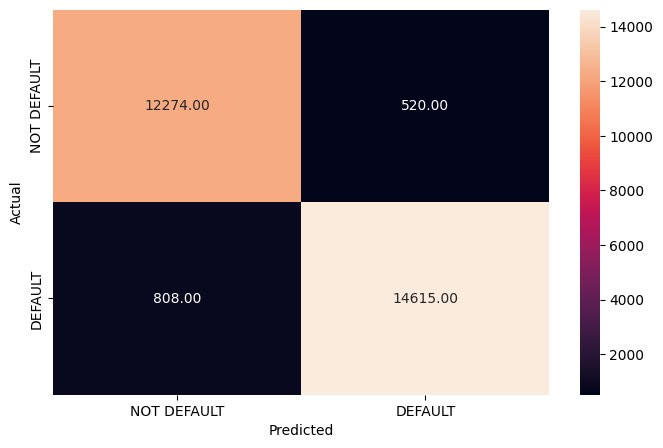

In [109]:
# Model Performance on the train data
y_pred_test_LGBMBO = lgbm_tuned_bayes.predict(x_test)
metrics_score(y_test, y_pred_test_LGBMBO)

In [110]:
# Model Performance on the test data
y_pred_test_LGBMBO = model_performance_classification(lgbm_tuned_bayes,x_test,y_test)

y_pred_test_LGBMRS_smote

,Precision,Recall,Accuracy
0,0.951685,0.953124,0.952653


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     35985
           1       0.99      0.98      0.99     35985

    accuracy                           0.99     71970
   macro avg       0.99      0.99      0.99     71970
weighted avg       0.99      0.99      0.99     71970



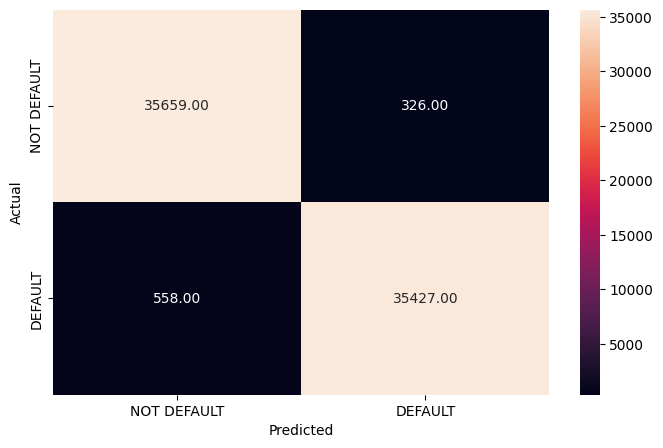

In [117]:
from lightgbm import LGBMClassifier
# Define the search space for hyperparameters
search_space_lgbm = {
    "learning_rate": (0.01, 0.2, 'log-uniform'),
    "n_estimators": (50, 500),
    "max_depth": (2, 9),
    "num_leaves": (15, 127),
    "min_child_samples": (10, 50),
    "subsample": (0.5, 1.0),
    "colsample_bytree": (0.5, 1.0),
    "reg_alpha": (0, 1),  # L1 regularization
    "reg_lambda": (0, 1),  # L2 regularization
}


# Instantiate BayesSearchCV
bayes_search = BayesSearchCV(lgbm, search_space_lgbm, n_iter=100, cv=kfold, n_jobs=-1, random_state=42)

# Fit the BayesSearchCV with the oversampled data using SMOTE
bayes_search.fit(x_train_smote, y_train_smote)

# Set the classifier to the best combination of parameters
lgbm_tuned = bayes_search.best_estimator_

# Fit the model
lgbm_tuned.fit(x_train_smote, y_train_smote)

# Make predictions on the training data
y_pred_train_LGBMBS_smote = lgbm_tuned.predict(x_train_smote)
metrics_score(y_train_smote, y_pred_train_LGBMBS_smote)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12794
           1       0.96      0.95      0.96     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.95      0.95     28217
weighted avg       0.95      0.95      0.95     28217



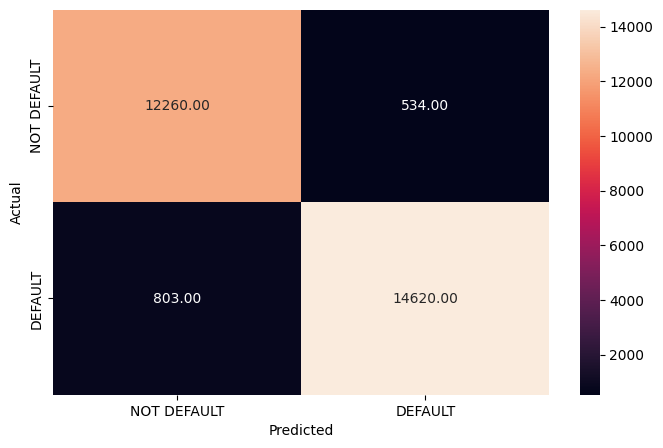

In [115]:
# Make predictions on the test data
y_pred_test_LGBMBS_smote = lgbm_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_LGBMBS_smote)

In [114]:
# Model Performance on the test data
y_pred_test_LGBMBS_smote = model_performance_classification(lgbm_tuned,x_test,y_test)

y_pred_test_LGBMRS_smote

,Precision,Recall,Accuracy
0,0.951685,0.953124,0.952653


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29853
           1       0.99      0.98      0.99     35985

    accuracy                           0.99     65838
   macro avg       0.98      0.99      0.99     65838
weighted avg       0.99      0.99      0.99     65838



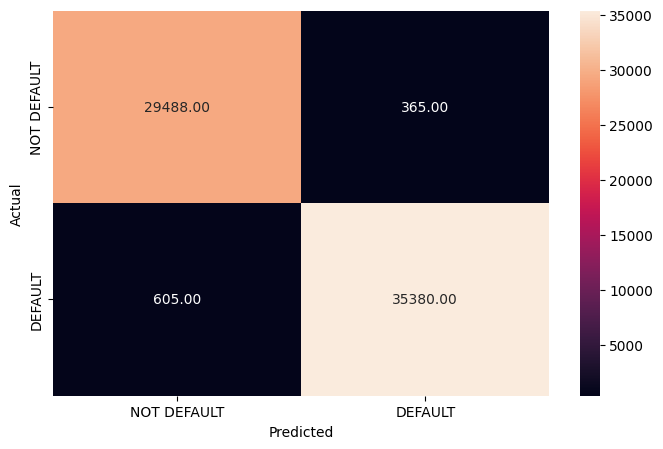

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12794
           1       0.96      0.95      0.95     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.95      0.95     28217
weighted avg       0.95      0.95      0.95     28217



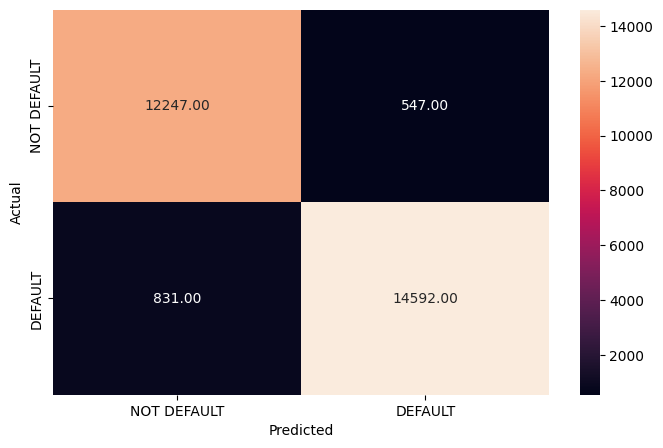

In [119]:
from sklearn.model_selection import train_test_split

# Разбиение обучающих данных на обучающую и валидационную выборки
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Обучение модели с использованием ранней остановки
lgbm_tuned.fit(
    x_train_split, y_train_split,
    eval_set=[(x_val_split, y_val_split)],
    eval_metric='auc',
    early_stopping_rounds=50,
    verbose=False
)

# Оценка производительности модели на обучающих данных
y_pred_train_lgbm_early_stop = lgbm_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_lgbm_early_stop)

# Оценка производительности модели на тестовых данных
y_pred_test_lgbm_early_stop = lgbm_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_lgbm_early_stop)

In [143]:
# Model Performance on the test data
lgbm_early_stop = model_performance_classification(lgbm_tuned,x_test,y_test)

#y_pred_test_
lgbm_early_stop


,Precision,Recall,Accuracy
0,0.951956,0.954006,0.953078


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     29853
           1       0.99      0.99      0.99     35985

    accuracy                           0.99     65838
   macro avg       0.99      0.99      0.99     65838
weighted avg       0.99      0.99      0.99     65838



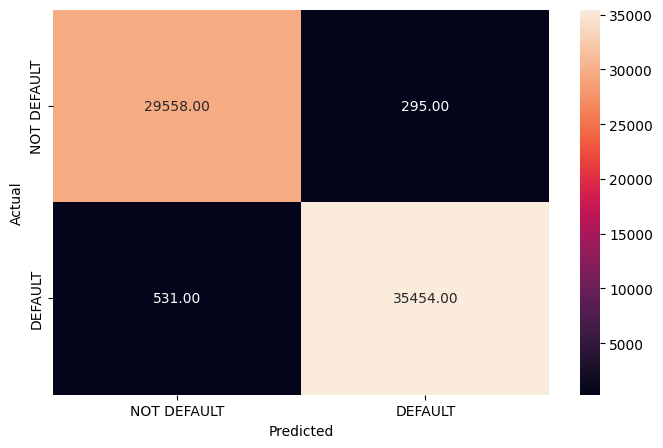

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12794
           1       0.96      0.95      0.96     15423

    accuracy                           0.95     28217
   macro avg       0.95      0.95      0.95     28217
weighted avg       0.95      0.95      0.95     28217



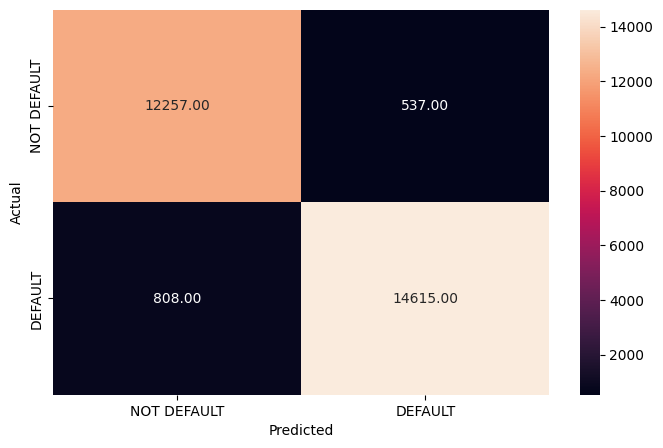

In [121]:
from sklearn.ensemble import VotingClassifier

# Создайте несколько LGBM моделей с разными значениями random_state
lgbm1 = lgb.LGBMClassifier(random_state=42, **random_obj.best_params_)
lgbm2 = lgb.LGBMClassifier(random_state=123, **random_obj.best_params_)
lgbm3 = lgb.LGBMClassifier(random_state=456, **random_obj.best_params_)

# Создайте ансамбль с использованием голосования
ensemble = VotingClassifier(estimators=[('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3)], voting='soft')

# Обучите ансамбль на данных
ensemble.fit(x_train, y_train)

# Оцените производительность ансамбля на обучающих данных
y_pred_train_ensemble = ensemble.predict(x_train)
metrics_score(y_train, y_pred_train_ensemble)

# Оцените производительность ансамбля на тестовых данных
y_pred_test_ensemble = ensemble.predict(x_test)
metrics_score(y_test, y_pred_test_ensemble)

In [142]:
# Model Performance on the test data
test_ensemble = model_performance_classification(ensemble,x_test,y_test)

test_ensembl

,Precision,Recall,Accuracy
0,0.951956,0.954006,0.953078


In [130]:
y_pred_test_LGBMBS_ros = model_performance_classification(lgbm_tuned,x_test,y_test)
y_pred_test_LGBMBS_ros

,Precision,Recall,Accuracy
0,0.951956,0.954006,0.953078
